In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy

games = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'
df = pd.read_csv(games)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [45]:
df = df.drop('Unnamed: 0', axis=1) # 불필요한 행 제거
df = df.dropna() # 결측치는 통계에 사용할 수 없다고 판단하여 제거
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


In [46]:
df.sort_values(by="NA_Sales",ascending=False).head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
14347,Animal Planet: Vet Life,Wii,2009.0,Simulation,Activision,90K,0,0,0.01
13798,King of Clubs: Mini Golf,Wii,2008.0,Sports,Oxygen Interactive,90K,0,0,0.01
13057,Mark Davis Pro Bass Challenge,PS2,2002.0,Sports,Natsume,90K,0.07,0,0.02
10650,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.81,7.57,4.13,1.92
6248,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13
10913,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63M,5.31,0.06,1.38
14856,Super Mario Bros. 3,NES,1988.0,Platform,Nintendo,9.54,3.44,3.84,0.46
14669,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.4,0.41,10.57
10899,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79
11137,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11,1.93,2.75


In [47]:
# 단위 통합을 위한 함수
def Unit(x):
  if type(x) == float or type(x) == int:
    return x
  if 'K' in x:
    if len(x) > 1:
      return float(x.replace('K','')) * 1
    return 1.0
  if 'M' in x:
    if len(x) > 1:
      return float(x.replace('M','')) * 1000
    return 1000.0
  else:
    if len(x) > 1:
      return float(x)

df['NA_Sales'] = df['NA_Sales'].apply(Unit)
df['EU_Sales'] = df['EU_Sales'].apply(Unit)
df['JP_Sales'] = df['JP_Sales'].apply(Unit)
df['Other_Sales'] = df['Other_Sales'].apply(Unit)

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     11855 non-null  float64
 6   EU_Sales     10692 non-null  float64
 7   JP_Sales     6181 non-null   float64
 8   Other_Sales  10010 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.2+ MB


In [48]:
df1 = df.fillna(0) # 0이었던 값은 NAN값으로 출력되었으므로 다시 0으로 대체
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.2+ MB


In [49]:
df1.sort_values(by="NA_Sales",ascending=False).head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10913,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9630.0,5.31,0.06,1.38
12600,Halo: Reach,X360,2010.0,Shooter,Microsoft Game Studios,7030.0,1.98,0.08,0.78
577,Mario Kart 64,N64,1996.0,Racing,Nintendo,5550.0,1.94,2.23,0.15
1964,The Legend of Zelda: Ocarina of Time,N64,1998.0,Action,Nintendo,4100.0,1.89,1.45,0.16
9829,Super Mario Bros. 3,GBA,2003.0,Platform,Nintendo,2930.0,1.25,0.83,0.20
7499,Tony Hawk's Pro Skater 3,PS2,2001.0,Sports,Activision,2660.0,1.29,0.01,0.46
13935,Crash Team Racing,PS,1999.0,Racing,Sony Computer Entertainment,2570.0,1.57,0.44,0.21
11996,Guitar Hero II,X360,2007.0,Misc,Activision,2010.0,0.02,0.00,0.17
9791,Call of Duty: Ghosts,PS4,2013.0,Shooter,Activision,1780.0,1.42,0.05,0.38
4978,Cooking Mama 2: Dinner With Friends,DS,2007.0,Simulation,505 Games,1610.0,1.50,0.10,0.39


In [50]:
df2 = df1
df2['Total_Sales'] = df1['NA_Sales'] + df1['EU_Sales'] + df1['JP_Sales'] + df1['Other_Sales']
df2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


# **# 지역별 선호하는 게임 장르 분석**

높은 판매량 = 높은 선호도로 가정

Genre
Action          22305.28
Shooter         12986.05
Racing          12288.75
Sports          11993.92
Platform         5659.16
Misc             4475.64
Simulation       3418.19
Role-Playing     1907.16
Fighting         1576.99
Strategy         1116.78
Adventure         859.03
Puzzle            201.50
Name: NA_Sales, dtype: float64

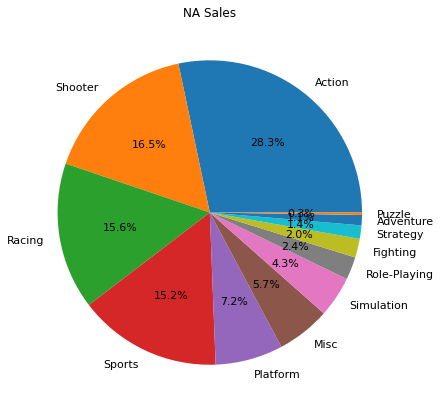

In [51]:
# NA지역의 판매량을 파이 차트로 시각화
NA = pd.DataFrame(df1[['Name','Platform','Year','Genre','Publisher','NA_Sales']])
NAratio = NA['NA_Sales'].groupby(NA['Genre']).sum().sort_values(ascending=False)
plt.figure(figsize=(10,7))
plt.title("NA Sales")
plt.pie(NAratio, labels = NAratio.index, autopct='%.1f%%', textprops={'size':11})
NAratio

Genre
Platform        7813.01
Action          7534.61
Shooter         6424.11
Sports          4207.13
Misc            3024.33
Racing          2270.98
Role-Playing    1789.48
Fighting        1518.48
Simulation      1220.88
Puzzle           460.06
Adventure        251.47
Strategy         164.70
Name: EU_Sales, dtype: float64

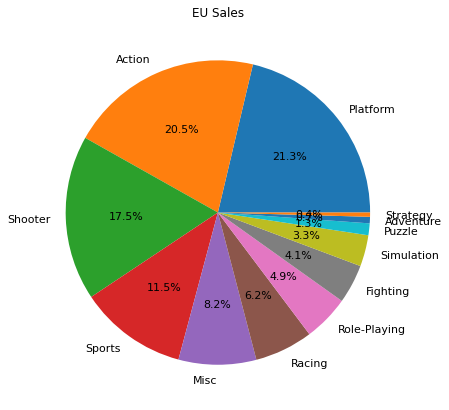

In [52]:
# EU지역의 판매량을 파이 차트로 시각화
EU = pd.DataFrame(df1[['Name','Platform','Year','Genre','Publisher','EU_Sales']])
EUratio = EU['EU_Sales'].groupby(EU['Genre']).sum().sort_values(ascending=False)
plt.figure(figsize=(10,7))
plt.title("EU Sales")
plt.pie(EUratio, labels = EUratio.index, autopct='%.1f%%', textprops={'size':11})
EUratio

Genre
Role-Playing    12111.15
Action           1595.16
Sports           1583.31
Fighting         1425.80
Simulation       1342.26
Strategy         1088.06
Platform          916.74
Misc              521.76
Racing            336.04
Adventure         131.79
Shooter            97.12
Puzzle             53.24
Name: JP_Sales, dtype: float64

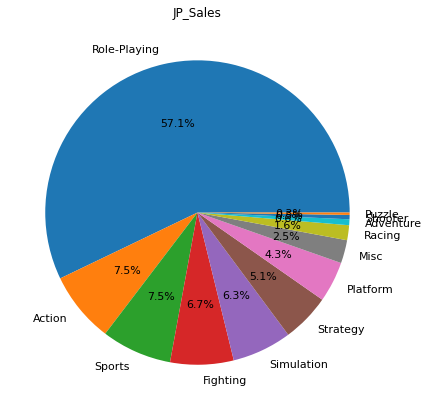

In [53]:
# JP지역의 판매량을 파이 차트로 시각화
JP = pd.DataFrame(df1[['Name','Platform','Year','Genre','Publisher','JP_Sales']])
JPratio = JP['JP_Sales'].groupby(JP['Genre']).sum().sort_values(ascending=False)
plt.figure(figsize=(10,7))
plt.title("JP_Sales")
plt.pie(JPratio, labels = JPratio.index, autopct='%.1f%%', textprops={'size':11})
JPratio

Genre
Role-Playing    1674.11
Action          1521.65
Sports          1291.19
Shooter          841.12
Fighting         535.65
Misc             532.18
Platform         530.97
Racing           496.09
Strategy         320.92
Adventure        296.42
Simulation       101.25
Puzzle            62.39
Name: Other_Sales, dtype: float64

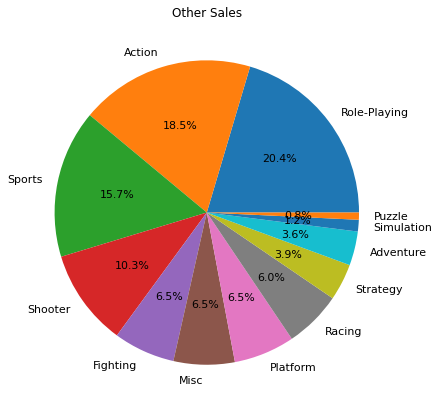

In [54]:
# Other지역의 판매량을 파이 차트로 시각화
OT = pd.DataFrame(df1[['Name','Platform','Year','Genre','Publisher','Other_Sales']])
OTratio = OT['Other_Sales'].groupby(OT['Genre']).sum().sort_values(ascending=False)
plt.figure(figsize=(10,7))
plt.title("Other Sales")
plt.pie(OTratio, labels = OTratio.index, autopct='%.1f%%', textprops={'size':11})
OTratio

# **# 연도별 게임 장르의 트렌드**

In [55]:
YT = pd.DataFrame(df2[['Year','Genre','Total_Sales']]) #연도, 장르, 총합 판매량으로만 이루어진 데이터프레임 생성
YT

pd.pivot_table(YT,values='Total_Sales',index=['Year','Genre']).head(30)

Total_Sales
Year Genre                    
0.0  Platform            0.090
     Shooter             0.020
     Strategy            0.200
1.0  Racing              0.700
     Sports              1.570
2.0  Misc                0.070
     Racing              0.130
     Sports              0.010
3.0  Platform            0.990
     Racing              0.545
     Simulation          0.300
     Sports              0.460
4.0  Action              0.210
     Platform            0.375
     Puzzle              0.050
5.0  Action              0.450
     Racing              0.060
     Role-Playing        0.090
     Sports              0.050
6.0  Action              1.385
     Fighting            0.020
     Shooter             0.555
     Simulation          0.020
     Sports              0.010
7.0  Puzzle              0.220
     Racing              0.010
8.0  Action              0.580
     Adventure           0.040
     Fighting            0.500
     Misc                0.085

In [56]:
#특이값인 연도 대체
def y1(x) :
  if float(x) < 20:
    return int(x) + 2000
  return int(x)

def y2(x) :
  if 80 < float(x) < 100 :
    return int(x) + 1900
  return int(x)

YT['Year'] = YT['Year'].apply(y1)
YT['Year'] = YT['Year'].apply(y2)

pd.pivot_table(YT,values='Total_Sales',index=['Year','Genre']).head(20)

Total_Sales
Year Genre                  
1980 Action         0.340000
     Fighting       0.770000
     Misc           0.675000
     Shooter        1.535000
1981 Action         4.987200
     Platform       2.306667
     Puzzle         1.125000
     Racing         0.480000
     Shooter        1.002000
     Simulation     0.440000
     Sports         0.195000
1982 Action         0.361111
     Misc           0.870000
     Platform       1.006000
     Puzzle         3.346667
     Racing         0.785000
     Shooter        0.762000
     Sports         0.530000
1983 Action         0.408571
     Adventure      0.400000

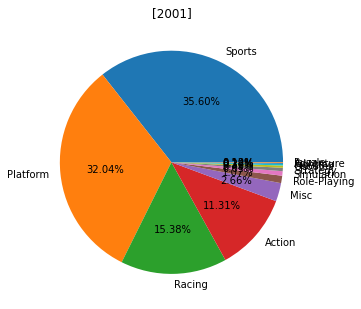

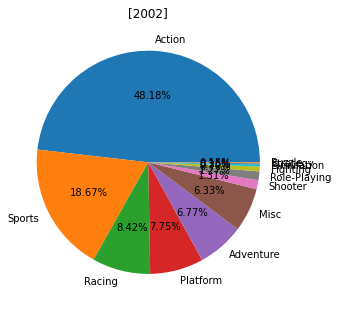

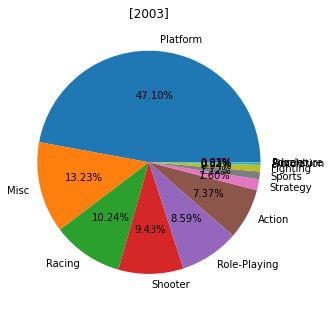

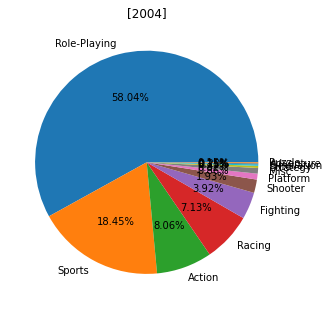

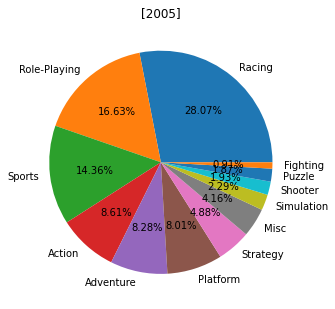

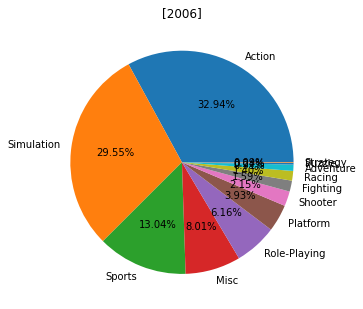

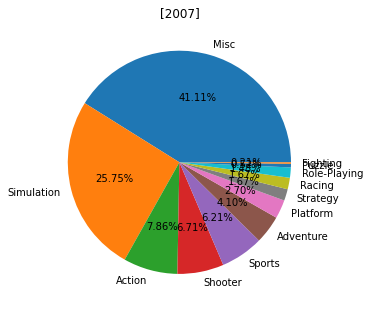

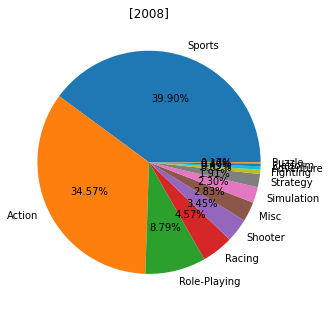

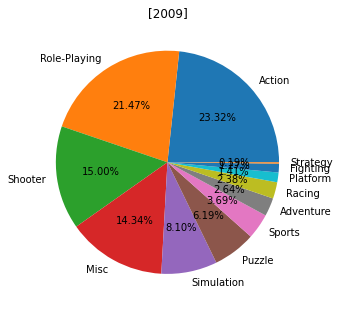

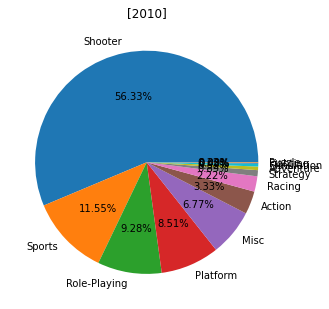

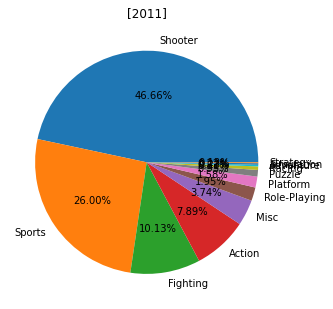

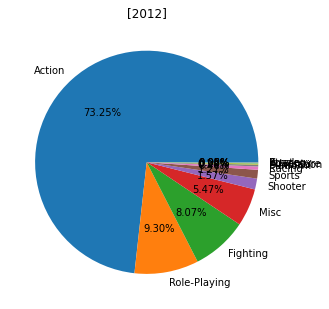

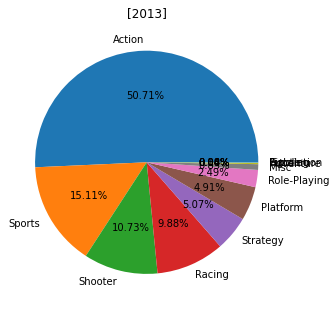

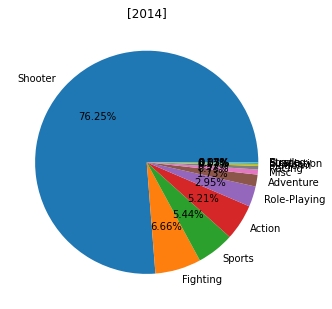

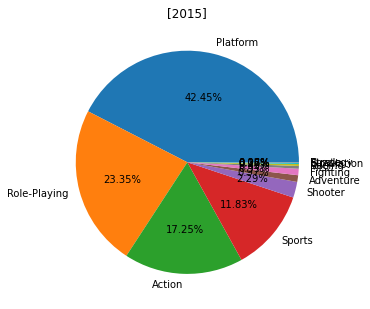

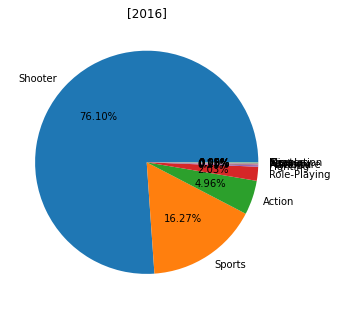

In [57]:
# 2001~2016 연도를 제외한 연도는 표본이 너무 적어 제외
year = [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

# 연도, 게임 장르별로 파이 그래프를 사용해 시각화
for i in year:
      i = YT[YT['Year'] == i]
      ratio = i['Total_Sales'].groupby(i['Genre']).sum().sort_values(ascending=False)
      plt.figure(figsize=(5,7))
      plt.pie(ratio, labels=ratio.index, autopct='%.2f%%')
      plt.title('{}'.format(i['Year'].unique()))
      plt.show()
  

각 연도에서 판매량이 가장 높았던 장르로는

**2001** - Sport, **2002** - Action, **2003** - Platform, **2004** - Role-Playing, **2005** - Racing

**2006** - Action, **2007** - Misc, **2008** - Sports, **2009** - Action,
**2010**- Shooter

**2011** - Shooter, **2012** - Action,**2013** - Action,**2014** - Shooter, **2015**- Platform, 

**2016** - Shooter 

이며, 장르별로 점유율이 많이 차이가 안나는 연도도 있었지만,

2010 Shooter 장르는 56%, 

2012 Action 장르는 73%, 

2013 Action 장르는 50%,

2014 Shooter 장르는 76%, 

2016 Shooter 장르는 76% 의 점유율을 보였으며

2010년 이후로는 Shooter, Action 장르가 트렌드라고 볼 수 있습니다.




# **# 출고량이 높은 게임에 대한 분석 및 시각화**



In [58]:
df3 = df2.sort_values(by='Total_Sales', ascending=False).head(20) # 내림차순으로 정렬후 상위 20개의 셀만 사용
df3


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
10913,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9630.00,5.31,0.06,1.38,9636.75
12600,Halo: Reach,X360,2010.0,Shooter,Microsoft Game Studios,7030.00,1.98,0.08,0.78,7032.84
577,Mario Kart 64,N64,1996.0,Racing,Nintendo,5550.00,1.94,2.23,0.15,5554.32
1964,The Legend of Zelda: Ocarina of Time,N64,1998.0,Action,Nintendo,4100.00,1.89,1.45,0.16,4103.50
1810,Pokemon FireRed/Pokemon LeafGreen,GBA,2004.0,Role-Playing,Nintendo,4.34,2.65,3150.00,0.35,3157.34
8533,Pokémon Yellow: Special Pikachu Edition,GB,1998.0,Role-Playing,Nintendo,5.89,5.04,3120.00,0.59,3131.52
9829,Super Mario Bros. 3,GBA,2003.0,Platform,Nintendo,2930.00,1.25,0.83,0.20,2932.28
7865,FIFA 14,X360,2013.0,Sports,Electronic Arts,0.92,2930.00,0.01,0.46,2931.39
6458,Super Mario 64,N64,1996.0,Platform,Nintendo,6.91,2850.00,1.91,0.23,2859.05
3589,Final Fantasy IX,PS,2000.0,Role-Playing,SquareSoft,1.62,0.77,2780.00,0.14,2782.53


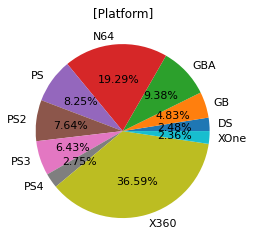

In [59]:
Plratio = df3['Total_Sales'].groupby(df3['Platform']).sum() # 플랫폼 별로 총 판매량에 대한 데이터 시각화
plt.title("[Platform]")
plt.pie(Plratio, labels = Plratio.index, autopct='%.2f%%', textprops={'size':11})
plt.show()

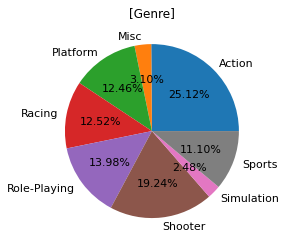

In [60]:
Geratio = df3['Total_Sales'].groupby(df3['Genre']).sum() # 장르에 따른 총 판매량에 대한 데이터 시각화
plt.title("[Genre]")
plt.pie(Geratio, labels = Geratio.index, autopct='%.2f%%', textprops={'size':11})
plt.show()

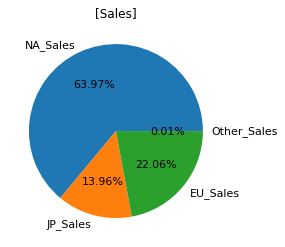

In [61]:
Saratio = [df3['NA_Sales'].sum(), df3['JP_Sales'].sum(), df3['EU_Sales'].sum(), df3['Other_Sales'].sum()] # 지역별 판매량에 따른 데이터 시각화
label = ['NA_Sales','JP_Sales','EU_Sales','Other_Sales']
plt.title("[Sales]")
plt.pie(Saratio, labels = label, autopct='%.2f%%', textprops={'size':11})
plt.show()

#**# 분석결과**

판매량 상위 20개 게임에 대한 플랫폼별, 장르별, 지역별 판매량을 위의 그래프로 보았을 때, 

플랫폼으로는 X360 을 사용하고,

2010년 이후부터 꾸준한 인기를 지니는 액션, 슈팅장르에 대한 게임 제작을 하는것이 좋아 보이며,

또한, NA지역의 점유율이 절반을 넘어가기 때문에, NA지역 사람들의 성향에 맞는 게임을 설계한다면 좋다고 생각합니다.